# Lecture 2
* Fair Experiments and Simulations
* Relative Frequency
* Proabilistic Models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Random Experiments

What is a random experiment?

<div class="alert alert-info" role="alert">
  <strong>Random Experiment</strong> 
    
A <strong>random experiment</strong> is an experiment for which the outcome is not completely predictable to an observer based on the observer's knowledge of the system and its inputs.
</div>

<div class="alert alert-info" role="alert">
  <strong>Outcome</strong>
    
An <strong>outcome</strong> is a non-decomposable result (or output) of a random experiment.
</div>

**<font color=blue>Examples:</font>**

1. Outcomes of flipping a coin: H, T

<!-- New line -->

2. Outcomes of rolling a die: 1,2,3,4,5,6
    * example that is not an outcome: even=2 or 4 or 6 (decomposable)

3. Outcomes for temperature: real numbers
    * example that is not an outcome:  >=90

4. Outcomes for favorite color

<div class="alert alert-info" role="alert">
  <strong>Sample Space</strong>
    
The set of all possible outcomes of a random experiment is called the <strong>sample space</strong> (or sometime the <strong>universal set</strong>). The sample space is denoted by $S$ or $\Omega$.
</div>

(A **set** is an unordered collection of *unique* items. More information on sets and set operations will be posted to the course website.)

## Random Experiment example

Let's consider the following experiment:

Given a coin:

1. What is the sample space for 1 flip of the coin? {H, T}

2. What is the sample space look like for 20 flips of the coin? {all possible ($x_1$,$x_2$,$\dots$,$x_{20}$) where each $x_i$ is in $\{H,T\}$}

<div class="alert alert-info" role="alert">
  <strong>Event</strong>
    
A set of outcomes $E \subset S$ (meaning $E$ is a subset of $S$) is called an <strong>event</strong>. We say that an event $E$ occurs if any of the outcomes in $E$ is the result of the experiment.
</div>

**<font color=blue>Examples:</font>**

* A die comes up even $E=\{2,4,6\}$
* The temperature is less than 40 degrees $E=(-\infty, 40)$

<div class="alert alert-info" role="alert">
  <strong>Event Class</strong>
    
The <strong>event class</strong> is the set of all events to which we assign probability. For our purposes, it is a set of subsets of $S$. 
</div>

If $S$ is finite, then the event class can be taken to be the power set of $S$ (the set of **all** subsets of $S$).

**<font color=blue>Examples:</font>**

* What is the event class for flipping a coin? { {H}, {T}, {H,T}, null}
* What is the event class for rolling a die? {null, {1}, {2},..., {6}, {1,2}, {1,3}, ..., {1,6}, ..., {6,6}, {1,2,3},...}

# First Random Experiment and Simulations

Consider the following questions:

1. **If you flip a coin 20 times, how many times do you think it will come up heads?** about 10 times

2. **If you flip the coin 20 times and it comes up heads 6 times, do you think it is a *fair* or *unfair* coin? How *confident* can you be in your answer?**

* Can you conduct an experiment to answer these questions? 

* What problems may you encounter in conducting this experiment? How can we overcome these problems?

Answers:
1. We expect the answer will be about 10 because the coin will come up heads one-half the time.

2. We don't know yet how to answer this.

If we take a **fair coin** and flip it 20 times and count the number of heads, and then **repeat the experiment many times**, we can **estimate** how often 6 or fewer heads occurs. If it occurs very rarely (say, less than 5% of the time, then we can say that the coin is unlikely to be fair).

*Here we use 6 or fewer heads because if 5 heads occurs, that is an even  more extreme outcome than 6 heads occurring, and so we want to count up how often we see an outcome as extreme OR MORE as 6 heads occurring.*

* The **problem** is that we may need to repeat the experiment (of flipping the coin 20 times) many times to accurately estimate how often 6 or fewer heads come up. This may require thousands of coin flips!

We can overcome this problem by using a computer to flip the coin in a **simulation**. A **computer simulation** is a computer program that models reality and allows us to conduct experiments that:

* would require a lot of time to carry out in real life
* would require a lot of resources to carry out in real life
* would not be possible to repeat in real life (for instance, simulation of the next day's weather or stock market performance)

Let's build simulations of our coin flip experiment and learn about some Python libraries:

In [1]:
# Simple library for working with random phenomena

import random

In [2]:
# Create our sample space -- here we use a list instead of a set
# as the Python object to represent S

faces = ['H', 'T']

In [3]:
random.choice?

In [4]:
random.choice(faces)

'H'

In [5]:
random.choices?

In [6]:
random.choices(faces, k=20)

['H',
 'H',
 'T',
 'H',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'T',
 'T',
 'T',
 'H',
 'H',
 'T',
 'H',
 'H',
 'H',
 'H']

In [7]:
coins = random.choices(faces, k=20)

In [8]:
coins.count('H')

12

Running this repeatedly is a pain! Fortunately, the computer can automatically run it for us:

In [13]:
num_sims = 25
flips = 20

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    print(sim, ': ', num_heads, ' Heads')

0 :  7  Heads
1 :  13  Heads
2 :  7  Heads
3 :  10  Heads
4 :  15  Heads
5 :  11  Heads
6 :  10  Heads
7 :  15  Heads
8 :  10  Heads
9 :  9  Heads
10 :  11  Heads
11 :  8  Heads
12 :  6  Heads
13 :  12  Heads
14 :  8  Heads
15 :  9  Heads
16 :  14  Heads
17 :  12  Heads
18 :  10  Heads
19 :  11  Heads
20 :  13  Heads
21 :  7  Heads
22 :  5  Heads
23 :  13  Heads
24 :  8  Heads


Suppose we want to see how often 6 or fewer heads occurs. We can reduce the printing by only printing those extreme events:

In [14]:
num_sims = 25
flips = 20

for sim in range(num_sims):
    coins = random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads<=6:
        print(sim, ': ', num_heads, ' Heads')

5 :  5  Heads
20 :  6  Heads


* We really don't care about the particular experiment on which those events occur. Instead, we are really just looking at the **frequency** of those events.

<div class="alert alert-info" role="alert">
  <strong>Relative Frequency</strong>
    
The <strong>relative frequency</strong> of an event is the number of times that an event occurs divided by the number of times the experiment is conducted. 
</div>

Let's modify the experiment to calculate the relative frequency of getting 6 or fewer heads on 20 flips of a fair coin:

In [15]:
num_sims=100_000
flips=20
event_count=0

for sim in range(num_sims):
    coins=random.choices(faces, k=flips)
    num_heads = coins.count('H')
    if num_heads<=4:
        event_count+=1

print('Relative frequency of 6 or fewer heads is ', event_count/num_sims)

Relative frequency of 6 or fewer heads is  0.00571


* How does the relative frequency change with the number of experiments simulated?

* For 1M simulated experiments, what is the relative frequency of 6 or fewer heads?

* What is your conclusion about whether this could be a fair coin?

* For 1M simulated experiments, what is the relative frequency of 4 or fewer heads?

### Binary Hypothesis Testing

This is an example of **binary hypothesis testing**. In this case, we set up two hypothesis:

<div class="alert alert-info">
    <b>Hypothesis Test</b>
    
$H_0$: (the *null hypothesis*) is that the observed effect is just caused by randomness in the sampling. It is not real in the underlying system or data. For this exampe, our null hypothesis is that the coin is actually fair.

$H_1$: (the *alternative hypothesis*) is that the observed effect is not just caused by random sampling. In this example, the coin is biased toward Tails.
</div>

In *classical statistics* when conducting hypothesis testing, we say that an effect is **<span style="color:blue">statistically significant</span>** if the probability of observing an effect of that size under the null hypothesis is **smaller than some small threshold value $\alpha$**. 

* Typical values of $\alpha$ are 0.05 or 0.01, but many statisticians argue for even smaller values now. 

* **The threshold $\alpha$ to determine statistical significance must always be determined before the experiment is conducted -- otherwise, there is too much temptation to adjust the threshold based on the observed relative frequency.**

* The measured relative frequency of the observed effect is called the **<span style="color:blue">$p$-value</span>**.

In classical hypothesis testing, we do *not* test the alternative hypothesis directly, nor can we utilize side information that we may already have about the two hypotheses.

# Probability and Fair Experiment

**Probability** is a very useful concept that can be interpreted in a number of ways.

The concept of probability is used to assess **uncertainty** of a situation, which can broadly be defined in two ways:
* **Frequency of Occurrence**: percentage of successes in a moderately large number of similar situations.
* **Subjective Belief**: use of personnal/group/cultural beliefs for given experiences of successful decision making.

In order to describe uncertainty in terms of probabilistic models and probabilistic reasoning, we make use of the generic structure of such models and their basic properties, in particular **set theory**.

<div class="alert alert-info">
    <b>Probability</b>
    
The **probability** of an event is a number between 0 and 1 that quantifies how likely that event is to occur. An event that cannot occur has probability 0, and an event that is sure to occur has probability 1. The probabilities of the outcomes sum to 1.
</div>

<div class="alert alert-info">
    <b>Fair</b>
    
We say an experiment is **fair** if every outcome is equally likely (they have the same probability).
</div>

__Proof__: Consider a fair experiment with $N$ outcomes, and let $p_i$ denote the probability of outcome $i$, then

\begin{align*} \sum_{i=1}^{N} p_i &= 1 \\
\sum_{i=1}^{N} p_1 &= 1 \\
Np_1 &= 1\\
p_1 &= \frac 1 N\\
p_i &= \frac 1 N
\end{align*}

* For example, the probability of getting any number on a fair 6-sided die is 1/6. Let's compare these to the *relative frequencies*.

But first let's see how to count the number of occurrences of each outcome:

In [18]:
num_sims = 100
values=[]

for sim in range(num_sims):
    die = random.choice(range(1,7))
    values += [die]
    
print(values)

[6, 4, 6, 4, 2, 5, 1, 3, 1, 1, 2, 1, 3, 6, 3, 2, 6, 2, 2, 6, 3, 4, 2, 1, 6, 4, 1, 5, 6, 2, 5, 4, 1, 3, 3, 2, 4, 5, 6, 2, 2, 4, 1, 3, 1, 6, 5, 6, 6, 5, 4, 2, 4, 2, 2, 2, 1, 3, 5, 3, 6, 5, 2, 4, 5, 1, 5, 6, 3, 2, 5, 4, 4, 2, 2, 4, 5, 3, 6, 6, 3, 4, 6, 5, 4, 6, 6, 3, 1, 4, 6, 1, 4, 4, 1, 6, 6, 1, 6, 5]


In [19]:
# Alternative

num_sims = 100
values = random.choices(range(1,7), k=num_sims)

print(values)

[5, 5, 1, 6, 6, 4, 5, 5, 5, 6, 6, 1, 2, 3, 2, 2, 6, 6, 6, 4, 3, 3, 4, 1, 6, 3, 5, 2, 6, 5, 3, 5, 1, 3, 5, 6, 4, 6, 1, 2, 4, 1, 5, 2, 3, 5, 5, 5, 3, 2, 3, 1, 2, 1, 5, 2, 3, 4, 4, 4, 3, 4, 2, 5, 2, 2, 2, 4, 5, 4, 1, 2, 5, 4, 6, 3, 3, 4, 5, 1, 3, 1, 1, 5, 3, 3, 4, 3, 6, 6, 1, 5, 6, 6, 6, 3, 4, 1, 2, 5]


Let's first keep a counter for each face value and increment that counter whenever we see that face value. Start with a list of 6 zeros:

In [25]:
counters = [0]*6
counters

[0, 0, 0, 0, 0, 0]

In [27]:
counters = [0]*6
num_sims=100
for sim in range(num_sims):
    die = random.choice(range(1,7))
    counters[die-1] +=1
    
counters

[19, 18, 14, 19, 18, 12]

We can use these counters to make our first plots. Let's start with a simple bar graph:

In [28]:
vals = list(range(1,7))
vals

[1, 2, 3, 4, 5, 6]

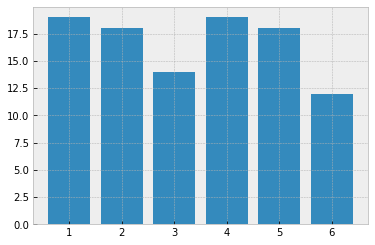

In [31]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

plt.bar(vals, counters);

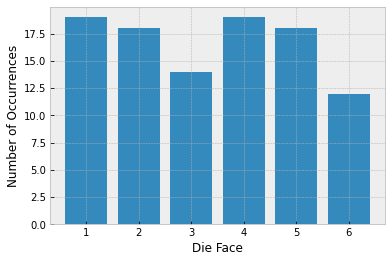

In [32]:
plt.bar(vals, counters)
plt.xlabel('Die Face')
plt.ylabel('Number of Occurrences');

Putting it all together, we have:

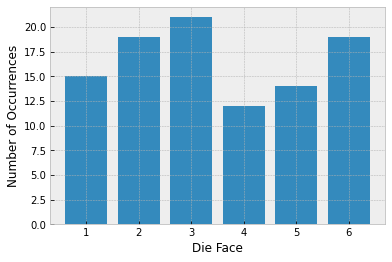

In [35]:
counters = [0]*6
num_sims=100
for sim in range(num_sims):
    die = random.choice(range(1,7))
    counters[die-1] +=1
    
plt.bar(vals, counters)
plt.xlabel('Die Face')
plt.ylabel('Number of Occurrences');

Here is a more elegant approach (using ```numpy```) if we just want the counts of the outcomes:

In [36]:
import numpy as np

num_sims=100
outcomes=[]
for sim in range(num_sims):
    die=random.choice(range(1,7))
    outcomes+=[die]
    
print(outcomes)

[2, 5, 3, 3, 2, 6, 1, 1, 1, 2, 3, 6, 6, 3, 6, 3, 6, 5, 2, 5, 2, 4, 1, 1, 1, 1, 1, 3, 2, 4, 2, 1, 1, 6, 1, 1, 4, 1, 2, 5, 2, 6, 4, 1, 3, 6, 1, 4, 3, 4, 4, 1, 3, 5, 4, 3, 6, 5, 6, 5, 4, 1, 2, 1, 5, 2, 2, 3, 5, 4, 6, 4, 3, 2, 1, 1, 1, 3, 5, 4, 2, 2, 4, 1, 1, 1, 5, 1, 1, 5, 2, 1, 5, 5, 1, 2, 6, 5, 3, 4]


In [37]:
np.unique(outcomes, return_counts=True)

(array([1, 2, 3, 4, 5, 6]), array([28, 17, 14, 14, 15, 12], dtype=int64))

Then to get the **relative frequencies** is easy:

In [39]:
num_sims=100
outcomes=[]
for sim in range(num_sims):
    die=random.choice(range(1,7))
    outcomes+=[die]

vals, counts = np.unique(outcomes, return_counts=True)
for i in range(len(vals)):
    print(vals[i], counts[i]/num_sims)

1 0.11
2 0.25
3 0.18
4 0.18
5 0.16
6 0.12


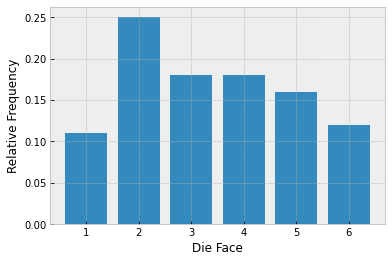

In [40]:
plt.bar(vals, counts/num_sims)
plt.xlabel('Die Face')
plt.ylabel('Relative Frequency');

* How does the relative frequency of each outcome change as we increase/decrease the number of simulations?

* What is your conclusion in terms of amount of data needed?

* Does the relative frequency *converge* to some value as the number of simulations increases?

___
**<font color=blue>Example 2:</font>** Consider the experiment where we flip a fair coin 20 times and we count how many times Heads occurred. Compute the relative frequency of each outcome.

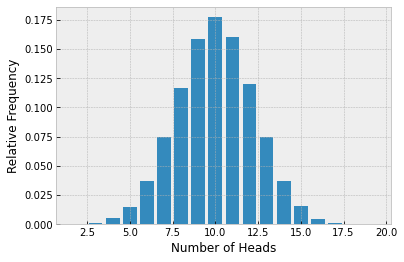

In [9]:
faces=['H','T']
num_sims=100_000
flips=20
counts=[]

for sim in range(num_sims):
    coins=random.choices(faces, k=flips) # the output coins is a list
    num_heads=coins.count('H') #count() is a method for lists
    counts+=[num_heads]
    
vals, unique_counts = np.unique(counts, return_counts=True)
plt.bar(vals, unique_counts/num_sims)
plt.xlabel('Number of Heads')
plt.ylabel('Relative Frequency');

* So why are the outcomes of this experiment not equally likely?

This experiment is a special case of a sequential probabilist model, also called **combined experiment**. Before we characterize it, we need to:
1. relate relative frequency with probability, and
2. define probabilistic models

# Probability as a Measure of Frequency of Occurrence

In the experiments we have conducted, the relative frequencies converge to some constant values when the number of simulations increases.

* The experiments we have conducted are **fair** or are **combined experiments** with fair sub-experiments, for which we (now) know how to calculate the probabilities:

<h3 align="center">the relative frequencies converge to the probabilities</h3>
    
* In an experiment, if the relative frequencies converge, we say the experiment possesses **statistical regularity** and consider those here.

Consider a random experiment that has $K$ possible outcomes, where $K<\infty$.

Let $N_k(n) \equiv \text{the number of times the outcome is }k$ and let the relative frequency of outcome $k$ be

\begin{align*}
r_k(n) = \frac{N_k(n)}{n}
\end{align*}

If the relative frequencies converge, i.e., $\lim_{n\rightarrow\infty}r_k(n)$ is a constant for each $k$, then we say that the experiment possesses statistical regularity and that the relative frequencies converge to the (true) probabilities.

<div class="alert alert-info">
    <b>Probability as a Measure of Frequency of Occurrence</b>
    
For experiments with statistical regularity,
\begin{align*}
\lim_{n\rightarrow\infty} r_k(n) = p_k
\end{align*}
is called the **probability of outcome $k$**.
</div>

### Properties of Relative Frequency

Note that 

\begin{align*}
0 \leq N_k(n) \leq n, \forall k
\end{align*}

because $N_k(n)$ is just the \# of times outcome $k$ occurs in $n$ trials.

Dividing by $n$ yields:

\begin{align*}
0 \leq \frac{N_k(n)}{n} = r_k(n) \leq 1, \forall k=1,\dots,K
\end{align*}

If $1,2,\dots,K$ are all of the possible outcomes, then

\begin{align*}
\sum_{k=1}^K N_k(n) = n
\end{align*}

Again, dividing by $n$ yields:

\begin{align*}
\sum_{k=1}^K r_k(n) = 1
\end{align*}

For example: Consider rolling a 6-sided die and let the **event** $E\equiv\text{even number occurs}$.

* *What can we say about the number of times $E$ is observed in $n$ trials?*

\begin{align*}
N_E(n) = N_2(n) + N_4(n) + N_6(n)
\end{align*}

* *What have we assumed in developing this equations?*

That the outcomes 2, 4 and 6 are mutually exclusive.

Then, dividing the $N_E(n)$ by $n$,

\begin{align*} r_E(n) = \frac{N_E(n)}{n} &= \frac{N_2(n) + N_4(n) + N_6(n)}{n} \\
&= r_2(n) + r_4(n) + r_6(n)
\end{align*}

<div class="alert alert-info">
    <b>Mutually Exclusive Events</b>
    
If $A$ and $B$ are two mutually exclusive (m.e.) events, and $C$ is the event that either $A$ or $B$ occurs, i.e., $C= A\cup B$, then

$$r_C(n) = r_A(n) + r_B(n)$$
</div>

* *What are some problems with defining probabilities as the limits of relative frequencies?*

    1. It is not clear when and in what sense the limit exists.
    2. It is not possible to perform an experiment an infinite number of times, so the probabilities can never be known exactly.
    3. We cannot use this definition if the experiment cannot be repeated.

We need a <font color=blue>mathematical model of probability</font> that is not based on a particular application or interpretation. However, any such model should:
1. be useful for solving real problems
2. agree with out interpretation of probability as relative frequency
3. agree with out intuition (<font color=blue>where appropriate!</font>)

# Probabilistic Models

We define a **probabilistic model** as a mathematical construction containing three elements. We say that a probability model is a *triple*: $(\Omega,\mathcal{F}, P)$.

We have already defined the **sample space** $\Omega$ and the event class $\mathcal{F}$. We need to specify $P$, the probability measure:

<div class="alert alert-info">
The <strong>probability measure</strong>, denoted by $P$, is a numerically-valued set function that maps all members of $\mathcal{F}$ onto $\mathbb{R}$.
</div>

Gathering this info together, we have:

<div class="alert alert-info">
    <b>Elements of a Probabilistic Model: $(\Omega, \mathcal{F}, P)$</b>
    
* The **sample space** $\Omega$, which is the set of all possible **outcomes** of an experiment. Different elements of the sample space should be distinct and *mutually exclusive*

* The **event** $\mathcal{F}$ a subset of the sample space, that is, a collection of possible **outcomes**

* The **probability measure** $P$ is a numerically-valued set function that maps all members of $\mathcal{F}$ onto $\mathbb{R}$, that is, $P: \mathcal{F} \longrightarrow \mathbb{R}$.
</div>

Consider an experiment with equally likely outcomes $S$, where $|S|=N$ (that is, the *cardinality* of $S$ is $N$).

If $E \subset S$ is an event that consists of $K$ equally likely outcomes
(i.e,. $E=\{ o_1, o_2, \ldots, o_K\}$

\begin{align*}
P(E) &= \sum_{j=1}^{K} P(o_j) \\
&= \sum_{j=1}^{|E|} \frac{1}{|S|}  \\
&= \frac{|E|}{|S|} \\
&= \frac{K}{N}
\end{align*}

___
**<font color=blue>Example 3:</font>** What is the probability of getting a 1 or 2 when rolling a fair 6-sided die?

% $\Omega=\{1,2,\ldots, 6\}$, $E=\{1,2\}$ and $P(E)=\frac{|E|}{|S|}=\frac{2}{6}=\frac{1}{3}$

___

## Axioms of Probability

**Axioms:** we specify a minimal set of rules that $P$ must obey.

1. $\forall E\in\mathcal{F}, P(E)\geq 0$

2. $P(\Omega)=1$

3. **Additivity axiom.** $\forall E, F \in \mathcal{F}, P(E\cup F) = P(E) + P(F)$ if $E$ and $F$ are mutually exclusive, that is, $E\cap F =\emptyset$

4. **Additivity axiom.** If $A_1,A_2,\dots$ is a sequence of events such that $A_i\cap A_j = \emptyset, \forall i\neq j$, then

\begin{align*}
P\left(\bigcup_{k=1}^{\infty} A_k\right) = \sum_{k=1}^{\infty} P(A_k)
\end{align*}

We can use Axioms 1-3 to deal with finite sample spaces. However, Axiom 4 is required instead of Axiom 3 for infinite sample spaces.

* Axiom 3 is a special case of Axiom 4.
* The unions and summations in Axiom 4 are over countable index sets only.

## Corollaries

Let $A\in\mathcal{F}$ and $B\in\mathcal{F}$ be two events. Then the following properties of $P$ can be derived from the axioms and the mathematical structure of $\mathcal{F}$:

(let's use the virtual whiteboard to prove these corollaries)

1. $P(A^c) = 1 - P(A)$

Proof: By axiom 1, $P(\Omega)=1$. Note that $A\cap\overline{A} = \emptyset$ (m.e.) and $A\cup \overline{A} = \Omega$. Then $P(A\cup \overline{A})=1$. By axiom 3 this is equal to $P(A) + P(\overline{A}) = 1 \Rightarrow P(\overline{A})=1-P(A)$.

2. $P(A) \leq 1$

Proof: $P(A) = 1-P(\overline{A})$, where $P(\overline{A})\geq 0$ by axiom 1.

3. $P(\emptyset) = 0 $

Proof: $\overline{\Omega}=\emptyset \iff \Omega = \overline{\emptyset}$. $P(\emptyset) = 1-P(\overline{\emptyset}) = 1-P(\Omega) = 1 - 1 = 0$

4. If $A_1,A_2,\dots,A_n$ are pairwise mutually exclusive, then $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_k)$. Proof is by induction.

5. $P(A\cup B) = P(A) + P(B) - P(A\cap B)$
    * **Exercise:** A fair six-sided die is rolled twice. What is the probability of observing either a 1 or a 2 on the top face on either roll? 
    
    Let $E_i = $1 or 2 on roll. $P(E_1\cup E_2) = P(E_1)+P(E_2)-P(E_1\cap E_2) = \frac{1}{3} + \frac{1}{3} - \frac{4}{36} = \frac{5}{9}$
    
    ($(1,1)$, $(1,2)$, $(2,1)$, $(2,2)$)

6. $P\left(\bigcup_{k=1}^n A_k\right) = \sum_{k=1}^n P(A_j) - \sum_{j<k} P(A_j\cap A_k) + \dots + (-1)^{(n+1)}P(A_1\cap A_2 \cap \dots\cap A_n)$

* *Add all single events, subtract off all intersections of pairs of events, add in all intersections of 3 events, ...* Proof is by induction.

7. If $A\subset B$, then $P(A)\leq P(B)$

Proof: $A$ and $ (B\cap \overline{A})$ are m.e. and $B=A \cup (B\cap \overline{A})$. Then $P(B) = P(A) + P(B\cap\overline{A})$, where $P(B\cap\overline{A})\geq 0$ by axiom 1.

___